In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#To scale the data using z-score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split #i am splitting my data into train data and test data

#I am using Algorithm KNN
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import accuracy_score

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')


In [2]:
df= pd.read_csv('/content/credit_train.csv')
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual_Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61328 entries, 0 to 61327
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       61328 non-null  object 
 1   Customer ID                   61327 non-null  object 
 2   Loan Status                   61327 non-null  object 
 3   Current Loan Amount           61327 non-null  float64
 4   Term                          61327 non-null  object 
 5   Credit Score                  49573 non-null  float64
 6   Annual_Income                 49573 non-null  float64
 7   Years in current job          58757 non-null  object 
 8   Home Ownership                61327 non-null  object 
 9   Purpose                       61327 non-null  object 
 10  Monthly Debt                  61327 non-null  float64
 11  Years of Credit History       61327 non-null  float64
 12  Months since last delinquent  28581 non-null  float64
 13  N

In [4]:
df.rename(columns={"Credit Score": "Credit_Score"}, inplace=True)
df.rename(columns={"Monthly Debt": "Monthly_Debt"}, inplace=True)
df.rename(columns={"Years of Credit History": "Years_of_Credit_History"}, inplace=True)
df.rename(columns={"Number of Open Accounts": "Number_of_Open_Accounts"}, inplace=True)
df.rename(columns={"Current Credit Balance": "Current_Credit_Balance"}, inplace=True)
df.rename(columns={"Months since last delinquent": "Months_since_last_delinquent"}, inplace=True)
df.rename(columns={"Number of Credit Problems": "Number_of_Credit_Problems"}, inplace=True)
df.rename(columns={"Maximum Open Credit": "Credit_Limit"}, inplace=True)
df.rename(columns={"Bankruptcies": "Bankruptcies"}, inplace=True)
df.rename(columns={"Tax Liens": "Tax_Liens"}, inplace=True)
df.rename(columns={"Customer ID": "Customer_ID"}, inplace=True)
df.rename(columns={"Loan ID": "Loan_ID"}, inplace=True)
df.rename(columns={"Loan Status": "Loan_Status"}, inplace=True)
df.rename(columns={"Current Loan Amount": "Current_Loan_Amount"}, inplace=True)
df.rename(columns={"Home Ownership": "Home_Ownership"}, inplace=True)
df.rename(columns={"Years in current job": "Years_in_current_job"}, inplace=True)

In [5]:
df.head()

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Credit_Limit,Bankruptcies,Tax_Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [6]:
df.drop(columns=['Loan_ID','Customer_ID'], inplace=True)

In [7]:
df.head()

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Credit_Limit,Bankruptcies,Tax_Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


# **Summary statistics for numerical data**

In [8]:
#create a list of numerical columns
num_cols=["Current_Loan_Amount","Credit_Score","Annual_Income","Monthly_Debt","Years_of_Credit_History","Current_Credit_Balance","Credit_Limit"]

#printing summary statistics
df[num_cols].describe()

,Current_Loan_Amount,Credit_Score,Annual_Income,Monthly_Debt,Years_of_Credit_History,Current_Credit_Balance,Credit_Limit
count,6.132700e+04,49573.000000,4.957300e+04,61327.000000,61327.000000,6.132700e+04,6.132600e+04
mean,1.180541e+07,1071.956630,1.376880e+06,18460.618385,18.164440,2.959172e+05,7.689942e+05
std,3.183713e+07,1466.783763,9.381303e+05,12250.141112,6.973287,3.892593e+05,9.166597e+06
min,1.124200e+04,585.000000,8.109200e+04,0.000000,3.600000,0.000000e+00,0.000000e+00
25%,1.798500e+05,705.000000,8.493570e+05,10203.950000,13.500000,1.126415e+05,2.731355e+05
50%,3.137200e+05,724.000000,1.170286e+06,16214.220000,16.900000,2.100830e+05,4.669610e+05
75%,5.266360e+05,741.000000,1.648440e+06,24000.990000,21.700000,3.681060e+05,7.836180e+05
max,1.000000e+08,7510.000000,3.647544e+07,435843.280000,70.500000,3.287897e+07,1.539738e+09


# **Feature Engineering**

In [9]:
#Creating a Debt-to-Income Ratio is a key financial indicator that lenders use to assess creditworthiness. It shows the proportion of a borrower's monthly gross income that goes towards paying debts.
df['DTI'] = df['Monthly_Debt'] / df['Annual_Income']
#Credit utilization ratio indicates how much of a borrower's available credit they are using. High credit utilization can negatively impact credit scores.
df['Credit_Utilization'] = df['Current_Credit_Balance'] / df['Credit_Limit']
#Instead of directly using the "Months_since_last_delinquent" column, i might consider calculating the number of years since the last delinquency. This can help provide a more interpretable feature.
df['Years_since_last_delinquent'] = df['Months_since_last_delinquent'] / 12
#The average age of a borrower's open accounts can be an indicator of credit history length and stability.
df['Avg_Account_Age'] = df['Years_of_Credit_History'] / df['Number_of_Open_Accounts']
#converting the scale of Monthly debt to Annual debt
df['Annual_Debt'] = df['Monthly_Debt'] * 12

# **Checking the distribution and outlier for each coloumn in the data**

Current_Loan_Amount
Skew: 2.41


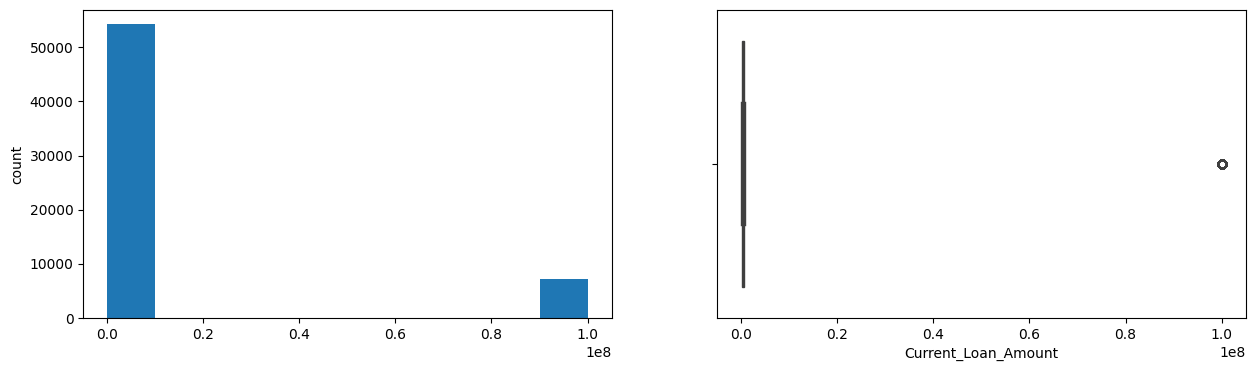

Credit_Score
Skew: 3.89


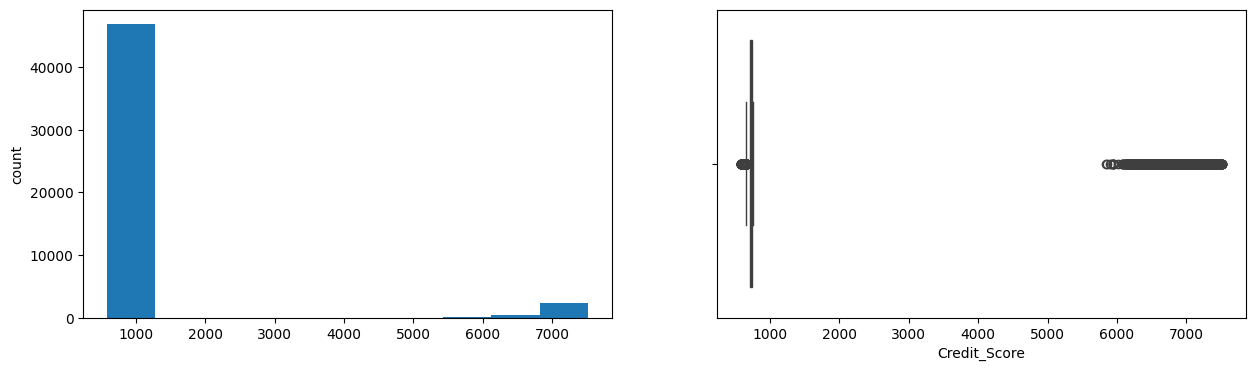

Annual_Income
Skew: 6.94


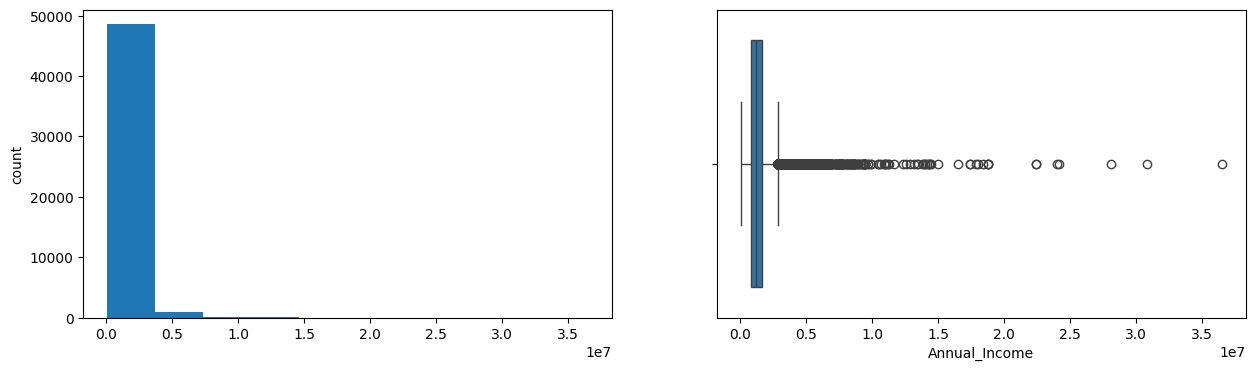

Monthly_Debt
Skew: 2.46


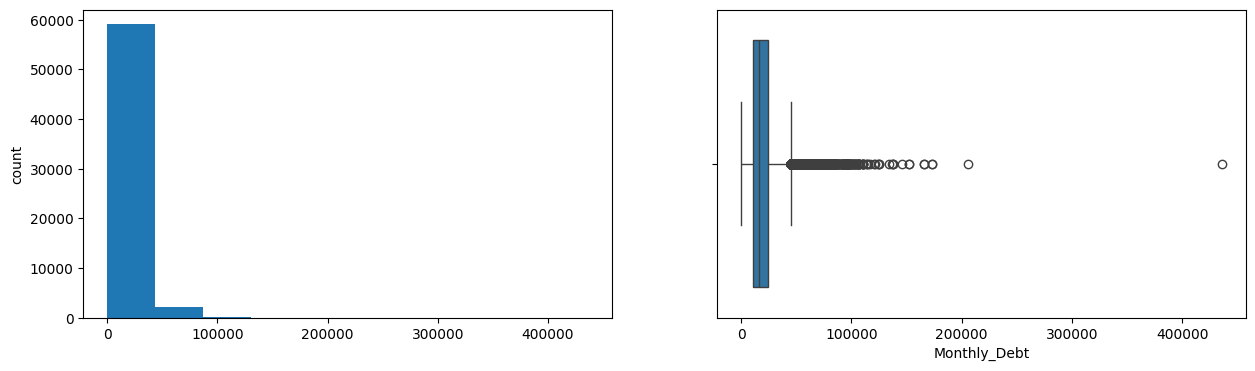

Years_of_Credit_History
Skew: 1.05


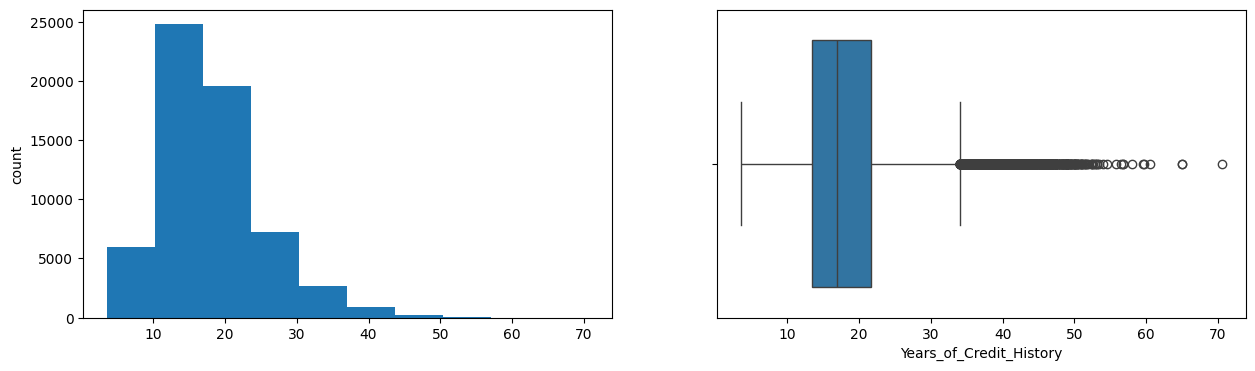

Current_Credit_Balance
Skew: 16.56


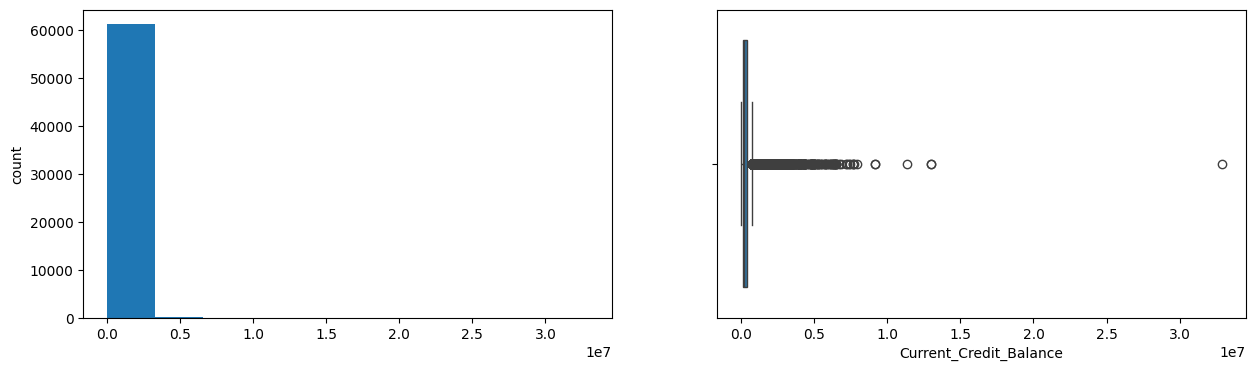

Credit_Limit
Skew: 133.9


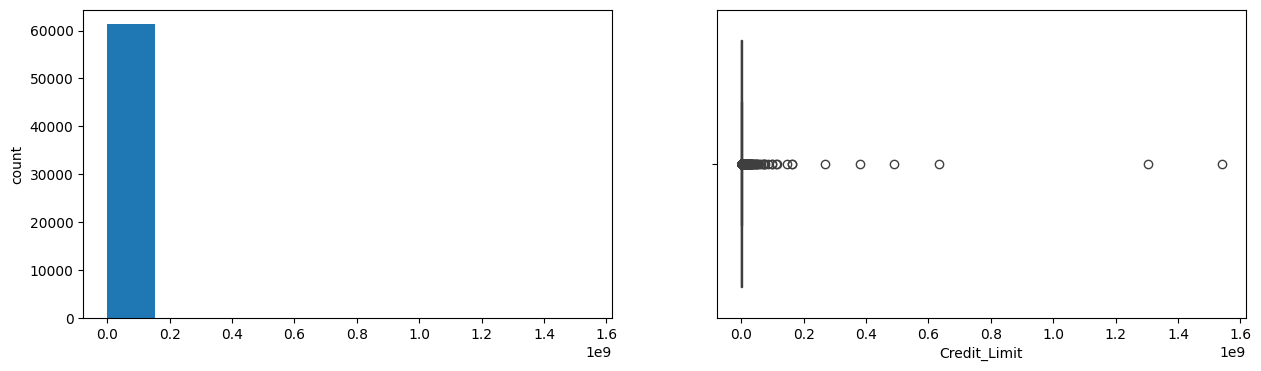

In [10]:
for col in ["Current_Loan_Amount","Credit_Score",	"Annual_Income","Monthly_Debt","Years_of_Credit_History","Current_Credit_Balance","Credit_Limit"]:
  print(col)
  print('Skew:',round(df[col].skew(),2))
  plt.figure(figsize=(15,4))
  plt.subplot(1,2,1)
  df[col].hist(bins=10,grid=False)
  plt.ylabel('count')
  plt.subplot(1,2,2)
  sns.boxplot(x=df[col])
  plt.show()

# **Checking percentage of each category for categorical variables**

In [11]:
#creating list of categorical columns
cat_col=["Loan_Status","Term","Years_in_current_job","Home_Ownership","Purpose"]

for col in cat_col:
  print(df[col].value_counts(normalize=True))
  print('*'*40)#print the * 40 times to separate different variables

Loan_Status
Fully Paid     0.774341
Charged Off    0.225659
Name: proportion, dtype: float64
****************************************
Term
Short Term    0.720237
Long Term     0.279763
Name: proportion, dtype: float64
****************************************
Years_in_current_job
10+ years    0.327195
2 years      0.094406
< 1 year     0.085283
3 years      0.083803
5 years      0.071770
1 year       0.066681
4 years      0.063448
6 years      0.059533
7 years      0.058223
8 years      0.047245
9 years      0.042412
Name: proportion, dtype: float64
****************************************
Home_Ownership
Home Mortgage    0.485284
Rent             0.420321
Own Home         0.092194
HaveMortgage     0.002201
Name: proportion, dtype: float64
****************************************
Purpose
Debt Consolidation      0.786440
other                   0.059289
Home Improvements       0.059126
Other                   0.031748
Business Loan           0.015621
Buy a Car               0.012719
Medic

# **Imputing missing values**

In [12]:
#Imputing missing values with mode for the categorical variables
for col in["Loan_Status","Term","Years_in_current_job","Home_Ownership","Purpose"]:
  df[col].fillna(value=df[col].mode()[0], inplace=True)

#Replacing 0's with null values in loan amount
df.Current_Loan_Amount.replace(0,np.nan,inplace=True)

#Imputing null values in loan amount with the median
df.Current_Loan_Amount.fillna(value=df.Current_Loan_Amount.median(), inplace=True)

In [13]:
#Cheking the null values
df.isnull().sum()

,0
Loan_Status,0
Current_Loan_Amount,0
Term,0
Credit_Score,11755
Annual_Income,11755
Years_in_current_job,0
Home_Ownership,0
Purpose,0
Monthly_Debt,1
Years_of_Credit_History,1


# **Imputing remaining null values**

In [14]:
#Imputing null values in Credit_Score with the median
df.Credit_Score.fillna(value=df.Credit_Score.median(), inplace=True)
#Imputing null values in Annual_Income with the median
df.Annual_Income.fillna(value=df.Annual_Income.median(), inplace=True)

#Imputing null values in Credit_Limit with the median
df.Credit_Limit.fillna(value=df.Credit_Limit.median(), inplace=True)
#Imputing null values in Credit_Limit with the median
df.Credit_Limit.fillna(value=df.Credit_Limit.median(), inplace=True)
#Bankruptcies/Tax_Liens
df['Bankruptcies'].fillna(0, inplace=True)
df['Tax_Liens'].fillna(0, inplace=True)
df['DTI'].fillna(df['DTI'].median(), inplace=True)
df['Credit_Utilization'].fillna(df['Credit_Utilization'].median(), inplace=True)
#Imputing null values in Months_since_last_delinquent with the median
df['Years_since_last_delinquent'].fillna(0, inplace=True)

In [15]:
#Cheking the null values
df.isnull().sum()

,0
Loan_Status,0
Current_Loan_Amount,0
Term,0
Credit_Score,0
Annual_Income,0
Years_in_current_job,0
Home_Ownership,0
Purpose,0
Monthly_Debt,1
Years_of_Credit_History,1


In [16]:
df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)#Label encoding

# Upto this data preprocessing is **done**

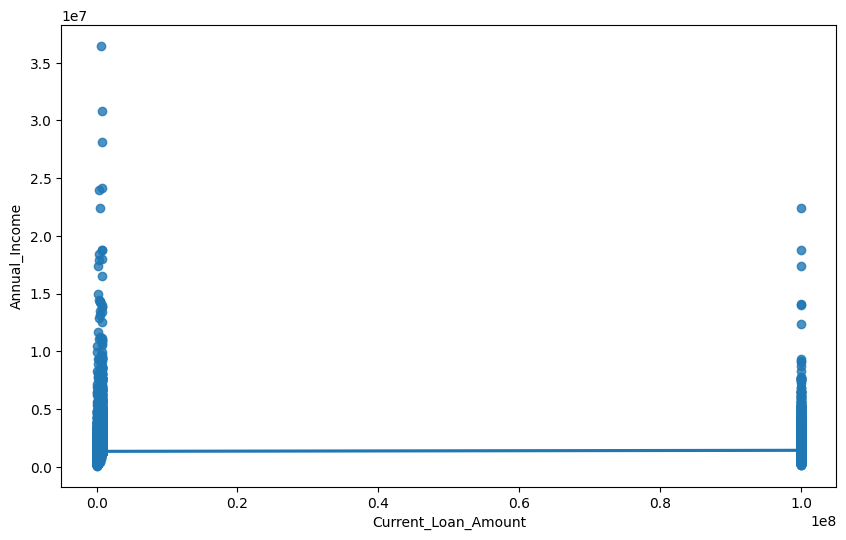

In [17]:
#lets check the relationship of loan amount with the total income
plt.figure(figsize=(10,6))
sns.regplot(x='Current_Loan_Amount', y='Annual_Income', data=df)
plt.show()

<Axes: xlabel='Loan_Status', ylabel='Annual_Income'>

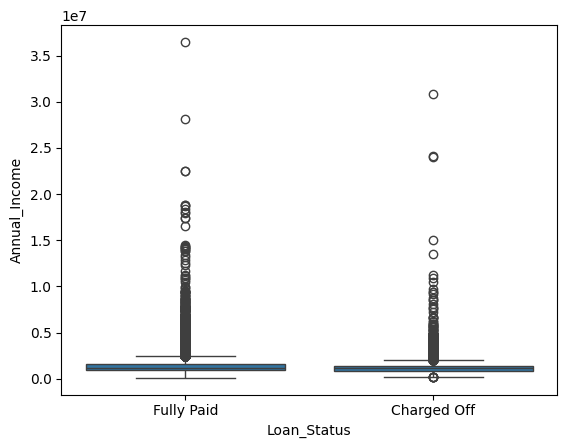

In [18]:
sns.boxplot(x=df.Loan_Status, y =df.Annual_Income)

<Axes: xlabel='Years_of_Credit_History', ylabel='count'>

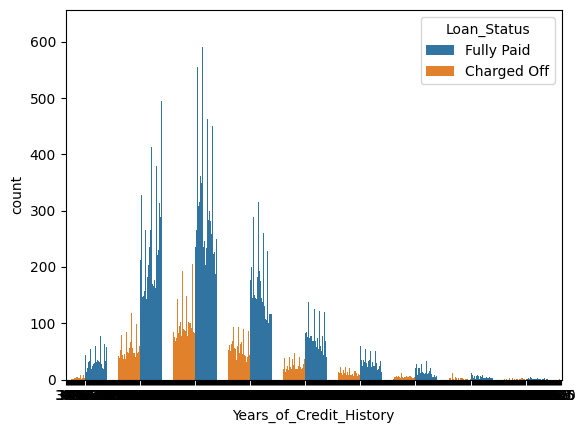

In [19]:
sns.countplot(x=df.Years_of_Credit_History, hue=df.Loan_Status)

<Axes: xlabel='Home_Ownership', ylabel='count'>

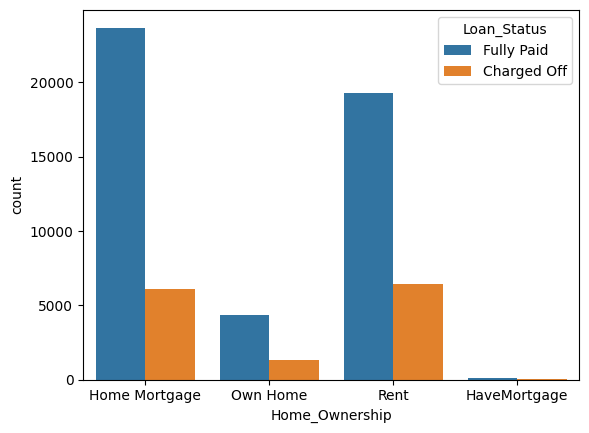

In [20]:
sns.countplot(x=df.Home_Ownership, hue=df.Loan_Status)

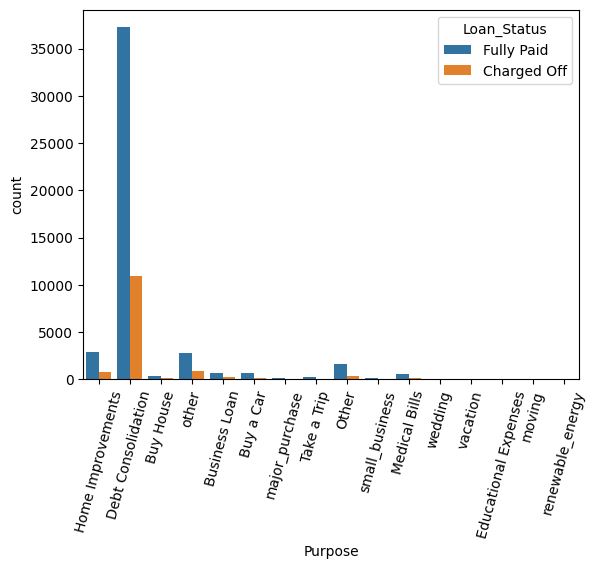

In [21]:
sns.countplot(x=df.Purpose, hue=df.Loan_Status)
plt.xticks(rotation=75)  # Rotate x-axis labels by 45 degrees
plt.show()

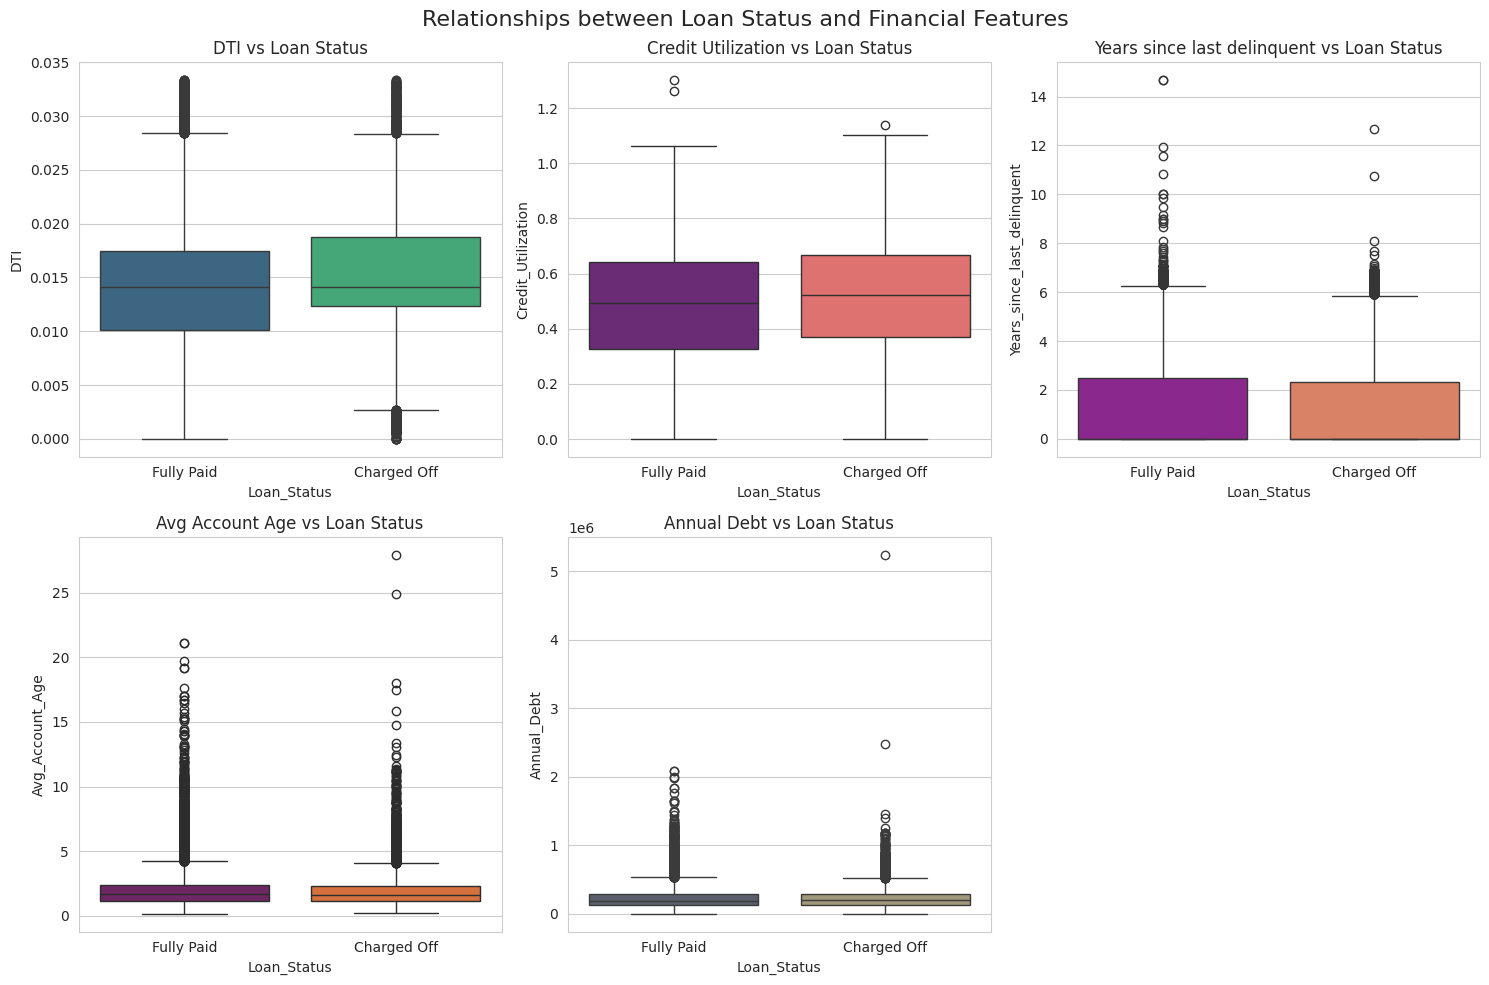

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Relationships between Loan Status and Financial Features", fontsize=16)

# Plot DTI vs Loan Status
sns.boxplot(ax=axes[0, 0], x="Loan_Status", y="DTI", data=df, palette="viridis")
axes[0, 0].set_title("DTI vs Loan Status")

# Plot Credit Utilization vs Loan Status
sns.boxplot(ax=axes[0, 1], x="Loan_Status", y="Credit_Utilization", data=df, palette="magma")
axes[0, 1].set_title("Credit Utilization vs Loan Status")

# Plot Years since last delinquent vs Loan Status
sns.boxplot(ax=axes[0, 2], x="Loan_Status", y="Years_since_last_delinquent", data=df, palette="plasma")
axes[0, 2].set_title("Years since last delinquent vs Loan Status")

# Plot Avg Account Age vs Loan Status
sns.boxplot(ax=axes[1, 0], x="Loan_Status", y="Avg_Account_Age", data=df, palette="inferno")
axes[1, 0].set_title("Avg Account Age vs Loan Status")

# Plot Annual Debt vs Loan Status
sns.boxplot(ax=axes[1, 1], x="Loan_Status", y="Annual_Debt", data=df, palette="cividis")
axes[1, 1].set_title("Annual Debt vs Loan Status")


# Remove the empty subplot
fig.delaxes(axes[1, 2])

# Adjust spacing between subplots
plt.tight_layout()


# **Prepare data for modeling**

In [23]:
#separating target variable and other variables
x=df.drop(columns=['Loan_Status'])
y=df['Loan_Status']

In [24]:
#creating dummy variables
#drop_first=True is used to avoid redundant variables
x=pd.get_dummies(x,drop_first=True)

In [25]:
#splitting the data into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
pred

#Evaluate the model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))
pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])

#error on train data
pred_train = knn.predict(x_train)
print(accuracy_score(y_train, pred_train))
pd.crosstab(y_train, pred_train, rownames=['Actual'], colnames=['Predicted'])

0.7523778466220991
0.7860420694635328


Predicted,Charged Off,Fully Paid
Actual,,
Charged Off,1383,8271
Fully Paid,914,32361


# **Data preprocessing is done again for x_train and x_test**

In [41]:
# Imputing null values in x_train with the median for numerical features
# Imputing null values in x_train with the mode for categorical features
for col in x_train.select_dtypes(include=['number']).columns:
  x_train[col].fillna(x_train[col].median(), inplace=True)
for col in x_train.select_dtypes(include=['object']).columns:
  x_train[col].fillna(x_train[col].mode()[0], inplace=True)

# Imputing null values in x_test with the median for numerical features
# Imputing null values in x_test with the mode for categorical features
for col in x_test.select_dtypes(include=['number']).columns:
  x_test[col].fillna(x_test[col].median(), inplace=True)
for col in x_test.select_dtypes(include=['object']).columns:
  x_test[col].fillna(x_test[col].mode()[0], inplace=True)

#Checking for any remaining null values
print(x_train.isnull().sum().sum())
print(x_test.isnull().sum().sum())

0
0


# **Tuning is done **

In [44]:
#Loop over a few values of the k to determine the best k
acc=[]
for i in range(1,21):
  neigh=KNeighborsClassifier(n_neighbors=i)
  neigh.fit(x_train,y_train)
  train_acc = np.mean(neigh.predict(x_train) ==y_train)
  test_acc = np.mean(neigh.predict(x_test) ==y_test)
  acc.append([train_acc, test_acc])

acc


[[1.0, 0.6910158160769607],
 [0.8520347550606816, 0.6116093265938366],
 [0.8421113932306832, 0.7149301592477852],
 [0.8123413077406881, 0.6763954562747976],
 [0.811269771017261, 0.7311810424479591],
 [0.79894709869785, 0.7066688406978641],
 [0.7965011996552447, 0.7381922930594054],
 [0.7904912762934148, 0.7210174466003587],
 [0.7907941018891659, 0.7477580303277352],
 [0.7874630203359034, 0.7349855970433176],
 [0.7860420694635328, 0.7523778466220991],
 [0.7853665354422419, 0.7435186694929072],
 [0.7842949987188148, 0.7576498722756672],
 [0.7842484101656223, 0.7501494646448177],
 [0.781406508420881, 0.7604217620522854],
 [0.7814298026974772, 0.7547692809391815],
 [0.7798690861655291, 0.763845861188108],
 [0.7796827319527592, 0.7590086417740095],
 [0.7785413123995434, 0.7643350182075113],
 [0.7783549581867735, 0.7603674112723517]]

# **K = 19 IS SELECTED**

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
pred

#Evaluate the model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))
pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])

#error on train data
pred_train = knn.predict(x_train)
print(accuracy_score(y_train, pred_train))
pd.crosstab(y_train, pred_train, rownames=['Actual'], colnames=['Predicted'])

0.7643350182075113
0.7785413123995434


Predicted,Charged Off,Fully Paid
Actual,,
Charged Off,632,9022
Fully Paid,485,32790


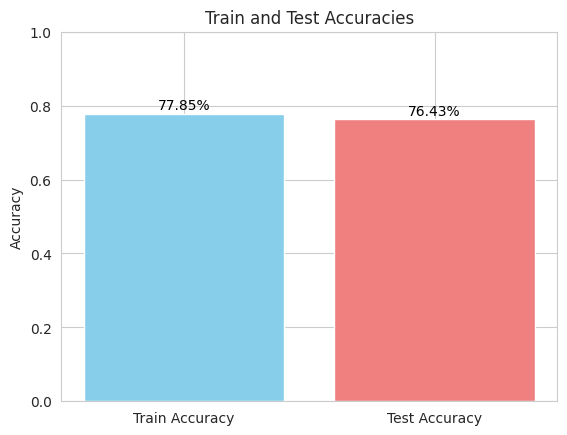

In [51]:
import matplotlib.pyplot as plt

train_acc = accuracy_score(y_train, pred_train)
test_acc = accuracy_score(y_test, pred)

# Convert accuracy to percentages with 2 decimal places for display
train_acc_percent = "{:.2%}".format(train_acc)
test_acc_percent = "{:.2%}".format(test_acc)

# Create the bar graph
labels = ['Train Accuracy', 'Test Accuracy']
accuracy_values = [train_acc, test_acc]
colors = ['skyblue', 'lightcoral']

plt.bar(labels, accuracy_values, color=colors)
plt.title('Train and Test Accuracies')
plt.ylabel('Accuracy')
plt.ylim([0, 1])  # Set y-axis limits between 0 and 1

# Add percentage labels on top of bars
for i, v in enumerate(accuracy_values):
    plt.text(i, v + 0.01, str("{:.2%}".format(v)), ha='center', color='black')  # Adjust 0.01 for vertical offset

plt.show()